At the request of a reviewer, this experiment shows the computed data about the embedding result, PCA outputs, and the cluster result using the example in Figure 2 in the paper.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Creating a graph

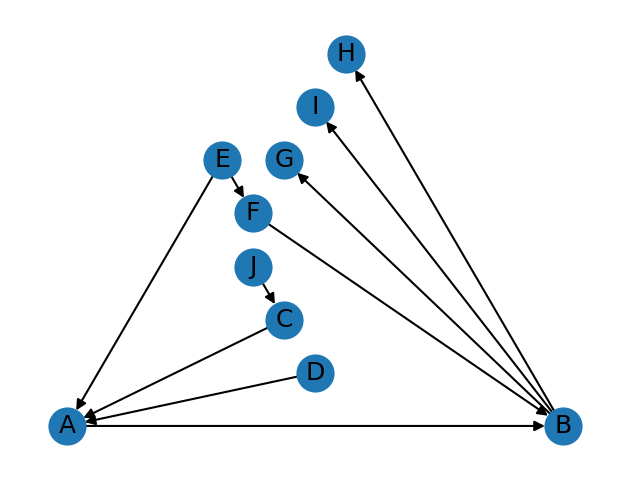

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (4, 3)

G = nx.DiGraph()
G.add_weighted_edges_from([('A','B',0.3),
                            ('B','G',0.2),
                            ('B','I',0.2),
                            ('B','H',0.2),
                            ('F','B',0.3),
                            ('E','A',0.1),
                            ('E','F',0.3),
                            ('C','A',0.1),
                            ('D','A',0.1),
                            ('J','C',0.1)])
balance=[0,0,0.2,0.2,0.2,0,-0.4,0,-0.1,-0.1]
nx.draw_planar(G, with_labels=True, node_size=300)
plt.show()

## RoleMagnet

In [3]:
import rolemagnet as rm
vec,role,label=rm.role_magnet(G, balance=balance)

Embedding: 100.00%  -
SOM shape: [8, 6]
Training SOM: 30


## Result

In [4]:
print ('Embedding result')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',vec[i])

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

reduced=PCA(n_components=2).fit_transform(StandardScaler().fit_transform(vec))
print ('\nPCA outputs')
for i in range(len(G.nodes)):
    print (list(G.nodes)[i],'\t',reduced[i])
    
print('\nCluster result')
for k,v in role.items():
    print(k,v[0])
    for i in v[1]:
        print('   ',list(G.nodes)[i])

Embedding result
A 	 [12.95228052  2.66264017  0.        ]
B 	 [20.42220831 -2.51192504  0.        ]
G 	 [-3.56053463  9.99800771  4.78339421]
I 	 [-3.56053463  9.99800771  4.78339421]
H 	 [-3.56053463  9.99800771  4.78339421]
F 	 [-0.2892332  -7.44691826  0.        ]
E 	 [-5.47187548 -9.45691323 -9.56678842]
C 	 [-1.85319454 -5.18813     0.        ]
D 	 [-7.12176888 -4.77034433 -2.3916971 ]
J 	 [-7.95681284 -3.28243244 -2.3916971 ]

PCA outputs
A 	 [-0.38482188  1.42065422]
B 	 [0.04734014 2.35184389]
G 	 [-1.7566518 -0.5694035]
I 	 [-1.7566518 -0.5694035]
H 	 [-1.7566518 -0.5694035]
F 	 [0.72871262 0.09142647]
E 	 [ 2.6077626  -0.46127856]
C 	 [ 0.52365535 -0.12312875]
D 	 [ 0.9421349  -0.72602527]
J 	 [ 0.80517167 -0.84528148]

Cluster result
16 [-0.4  1.6]
    A
23 [0.  2.2]
    B
0 [-1.8 -0.6]
    G
    I
    H
26 [0.8 0. ]
    F
    C
43 [ 2.6 -0.4]
    E
30 [ 1.  -0.8]
    D
    J
